Dans ce script, nous allons tester différents modèles de type convolution Nelle pour examiner leur performance. Nous allons ensuite tester s'ils sont robustes lorsqu'on applique une rotation à l'image d'entrée.

In [1]:
import retinoto_py as fovea
args = fovea.Params(do_mask=True)
args

Welcome on macOS-26.1-arm64-arm-64bit-Mach-O	 user laurent	Running on MPS device (Apple Silicon/MacOS)	 - macos_version = 26.1	 with device mps, pytorch==2.9.1
Random seed 1998 has been set.


Params(image_size=224, do_mask=True, do_fovea=False, rs_min=0.0, rs_max=-5.0, padding_mode='zeros', seed=1998, batch_size=64, num_workers=4, in_memory=True, model_name='resnet101', do_scratch=False, num_epochs=10, n_train_stop=32768, n_val_stop=4096, lr=0.003, delta1=0.03, delta2=0.0, weight_decay=0.01, label_smoothing=0.0001, shuffle=True, verbose=True)

# transfer learning of each network on the  masked dataset

In [2]:
# %rm cached_data/20_model_name=resnet101_dataset=full_retrained.lock   # FORCING RECOMPUTE
model_name = args.model_name
for dataset in fovea.all_datasets:
    name = f'20_model_name={model_name}_dataset={dataset}_retrained'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)
    print(50*'.')

Load JSON from pre-trained resnet cached_data/20_model_name=resnet101_dataset=full_retrained.json
cached_data/20_model_name=resnet101_dataset=full_retrained.pth: accuracy = 0.038
..................................................


Putting images in memory:   0%|          | 0/32768 [00:00<?, ?it/s]

Putting images in memory:   0%|          | 0/4096 [00:00<?, ?it/s]

Training model resnet101, file= cached_data/20_model_name=resnet101_dataset=bbox_retrained.pth - image_size=224
Model has 1000 output features to final FC layer for 1000 classes.
Starting learning...


Epochs:   0%|          | 0/10 [00:00<?, ?it/s]

epoch=1/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 1/10:   0%|          | 0/64 [00:00<?, ?it/s]

epoch=2/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 2/10:   0%|          | 0/64 [00:00<?, ?it/s]

epoch=3/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 3/10:   0%|          | 0/64 [00:00<?, ?it/s]

epoch=4/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 4/10:   0%|          | 0/64 [00:00<?, ?it/s]

epoch=5/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 5/10:   0%|          | 0/64 [00:00<?, ?it/s]

epoch=6/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 6/10:   0%|          | 0/64 [00:00<?, ?it/s]

epoch=7/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 7/10:   0%|          | 0/64 [00:00<?, ?it/s]

epoch=8/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 8/10:   0%|          | 0/64 [00:00<?, ?it/s]

epoch=9/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 9/10:   0%|          | 0/64 [00:00<?, ?it/s]

epoch=10/10:   0%|          | 0/512 [00:00<?, ?it/s]

Vat @Epoch 10/10:   0%|          | 0/64 [00:00<?, ?it/s]

Saving...cached_data/20_model_name=resnet101_dataset=bbox_retrained.pth
Training completed in 32m 34s
..................................................


## Model comparison

TODO Faire un nouveau notebook 23_

In [3]:
results_13 = fovea.pd.read_json(args.data_cache / '13_model_comparison.json')
results_13

,model_name,do_mask,dataset,accuracy,wall_clock_time,total_parameters,trainable_parameters,total_layers
0,resnet18,True,full,0.528809,9.539842,11689512,11689512,68
1,resnet50,True,full,0.789307,15.991482,25557032,25557032,151
2,resnet101,True,full,0.807129,29.764273,44549160,44549160,287
3,resnet18,True,bbox,0.419678,8.108312,11689512,11689512,68
4,resnet50,True,bbox,0.723145,14.678932,25557032,25557032,151
5,resnet101,True,bbox,0.753174,21.924049,44549160,44549160,287
6,resnet18,False,full,0.686768,9.219930,11689512,11689512,68
7,resnet50,False,full,0.802979,15.812416,25557032,25557032,151
8,resnet101,False,full,0.803223,22.476610,44549160,44549160,287
9,resnet18,False,bbox,0.625000,7.508915,11689512,11689512,68


In [4]:
for dataset in fovea.all_datasets:
    name = f'20_model_name={model_name}_dataset={dataset}_retrained'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)
    results = fovea.pd.read_json(json_filename)
    print(results)

Load JSON from pre-trained resnet cached_data/20_model_name=resnet101_dataset=full_retrained.json
cached_data/20_model_name=resnet101_dataset=full_retrained.pth: accuracy = 0.038
    epoch  i_image  total_image  loss_train  acc_train   loss_val   acc_val  \
0       0     6464        19202    0.170983   0.945891   0.990043  0.792187   
1       1     6464        38404    0.071813   0.976200   1.088533  0.782812   
2       2     6464        57606    0.045622   0.985939   1.281810  0.755625   
3       3     6464        76808    0.035371   0.989064   1.244092  0.747500   
4       4     6464        96010    0.029115   0.990782   1.429504  0.731719   
5       5     6464       115212    0.027784   0.991199   1.500364  0.703750   
6       6     6464       134414    0.026516   0.991668   1.631877  0.681719   
7       7     6464       153616    0.027017   0.990782   1.878743  0.646562   
8       8     6464       172818    0.023101   0.991511   2.300825  0.608437   
9       9     6464       192020

## Plot learning evolution

Load JSON from pre-trained resnet cached_data/20_model_name=resnet101_dataset=full_retrained.json
cached_data/20_model_name=resnet101_dataset=full_retrained.pth: accuracy = 0.038
Load JSON from pre-trained resnet cached_data/20_model_name=resnet101_dataset=bbox_retrained.json
cached_data/20_model_name=resnet101_dataset=bbox_retrained.pth: accuracy = 0.061


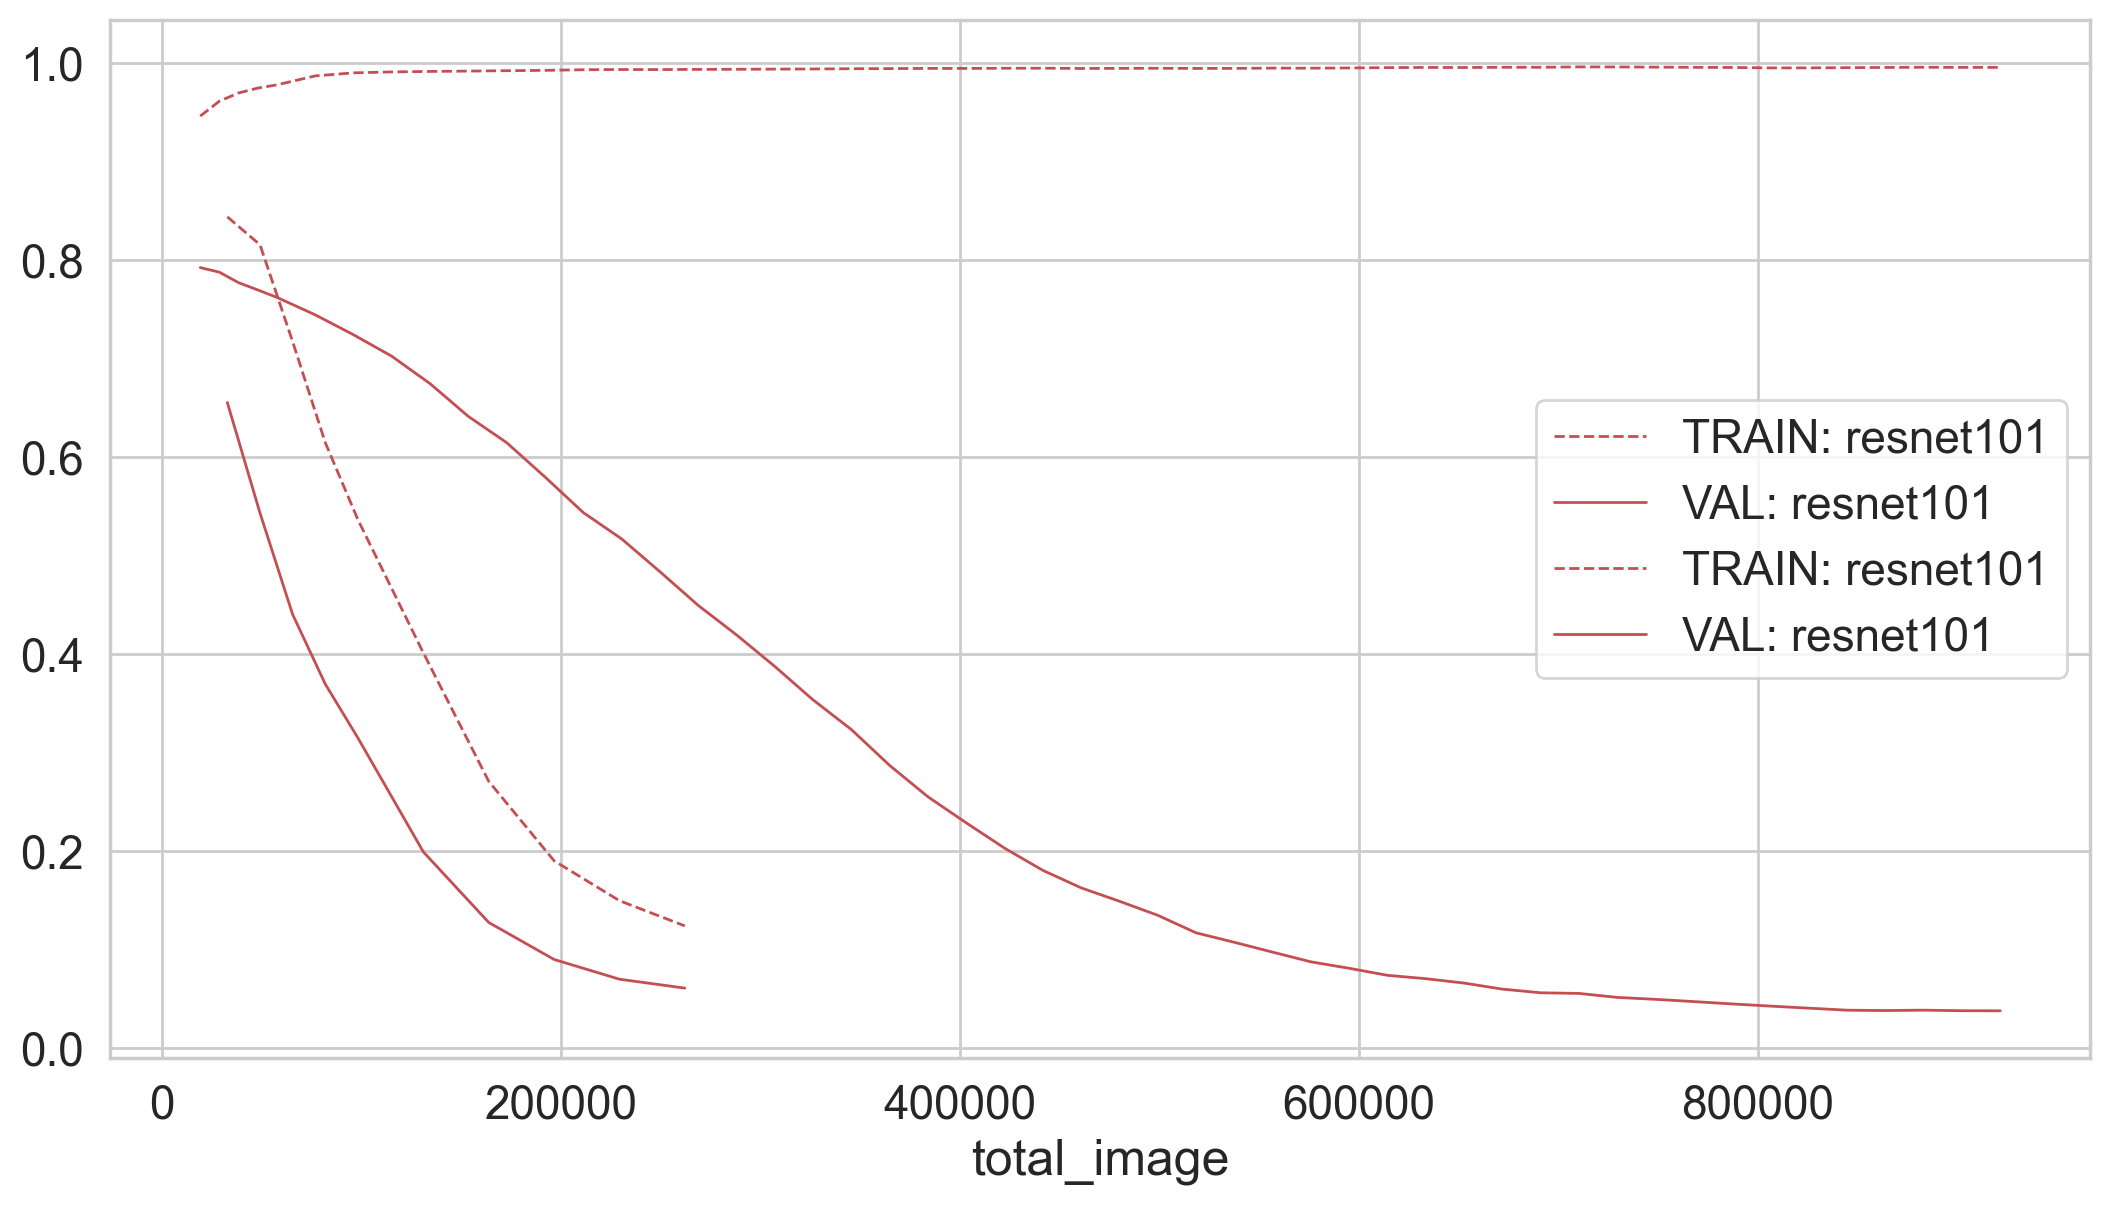

In [5]:
fig, ax = fovea.plt.subplots()
for dataset in fovea.all_datasets:
    color = 'r'
    lw = 1

    name = f'20_model_name={model_name}_dataset={dataset}_retrained'
    model_filename, json_filename = fovea.do_learning(args, dataset, name)

    df_train = fovea.pd.read_json(json_filename, orient='records')

    df_train_roll = df_train.rolling(window=5, min_periods=1, center=False).mean()
    ax = df_train_roll.plot(x='total_image', y='acc_train', 
                        c=color, ls='dashed', lw=lw,
                        grid=True, ax=ax, label='TRAIN: ' + args.model_name)    
    ax = df_train_roll.plot(x='total_image', y='acc_val', 
                        c=color, lw=lw,
                        grid=True, ax=ax, label='VAL: ' + args.model_name)   

In [6]:
df_train

,epoch,i_image,total_image,loss_train,acc_train,loss_val,acc_val,time
0,0,4096,32768,0.567733,0.843658,1.480881,0.655273,200.456478
1,1,4096,65536,0.936299,0.787048,2.699296,0.431152,400.454920
2,2,4096,98304,2.275548,0.520111,3.964146,0.234131,611.490133
3,3,4096,131072,3.356942,0.306854,4.493141,0.157471,826.825777
4,4,4096,163840,3.926576,0.222900,5.038017,0.095947,1042.231633
5,5,4096,196608,4.313538,0.169342,5.143771,0.077881,1251.583061
6,6,4096,229376,4.554807,0.135559,5.153811,0.073486,1425.463944
7,7,4096,262144,4.710346,0.117126,5.460459,0.046387,1601.626231
8,8,4096,294912,4.817454,0.104370,5.288309,0.057373,1777.641940
9,9,4096,327680,4.892545,0.095154,5.397671,0.050781,1953.702990
